# Word Embedding Analyses and Visualizations

This code reproduces the output, table, and 5 visualizations presented in the paper "Leveraging the Alignment between Machine Learning and Intersectionality: Using Word Embeddings to Measure Intersectional Experiences of the Nineteenth Century U.S. South."


# Data Prep

In [1]:
import glob
import gensim
import itertools
import numpy as np
import pandas
import random
import json
import os
import string

#for primary visualizations
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

#for PCA visualization
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA


In [2]:
def tuple_to_dict(mytuple):
    """
    Input a tuple, output a dictionary
    """
    
    mydict = {}
    for key, value in mytuple:
        if key not in mydict:
            mydict[key] = value
    return mydict

def add_ave_vec(mymodel, gender_list, race_list, new_word):
    """
    This function produces an average resultant vector from a word2vec model, 
    produced by averaging the sum of two vectors across all possible pairs from two word lists
    
    Input: a word2vec model, two synonym lists, and the label for the resultant vector
    Output: the word2vec model with the new vector added
    """
    
    mylist = []
    for e in itertools.product(gender_list, race_list):
        mylist.append((mymodel[e[0]] + mymodel[e[1]]))

    new_vec = ((np.add.reduce(mylist)) / len(mylist))
    mymodel.add(new_word, new_vec)
    return(mymodel)

def calc_ci(model, id_flag, ins_flag):
    
    """
    This function takes a word2vec model as input, and outputs the mean distance between
    a target social identity (id_flag) and the 50 vectors associated with the target institution (ins_flag)
    
    Input: a word2vec model, an social identity flag (id_flag), and a social institution flag (ins_flag)
    Output: average cosine similarity between social identity vector and 50 social institution vectors
    
    """

    count = len(model.vocab.keys())
    
    white_woman = model.most_similar('whitewomen', topn=count)
    white_woman_dict = tuple_to_dict(white_woman)
    white_woman_dict['whitewomen'] = 1.0
    
    black_woman = model.most_similar('blackwomen', topn=count)
    black_woman_dict = tuple_to_dict(black_woman)
    black_woman_dict['blackwomen'] = 1.0
    
    black_man = model.most_similar('blackmen', topn=count)
    black_man_dict = tuple_to_dict(black_man)
    black_man_dict['blackmen'] = 1.0
    
    white_man = model.most_similar('whitemen', topn=count)
    white_man_dict = tuple_to_dict(white_man)
    white_man_dict['whitemen'] = 1.0
    
    n = 50
    
    polity = model.most_similar(['nation', 'state'], topn=count)
    polity_dict = tuple_to_dict(polity)
    polity_words = [word for word, score in polity][:n]
    
    economy = model.most_similar(['money'], topn=count)
    economy_dict = tuple_to_dict(economy)
    economy_words = [word for word, score in economy][:n]
    
    culture = model.most_similar(['culture'], topn=count)
    culture_dict = tuple_to_dict(culture)
    culture_words = [word for word, score in culture][:n]
    
    domestic = model.most_similar(['housework', 'children'], topn=count)
    domestic_dict = tuple_to_dict(domestic)
    domestic_words = [word for word, score in domestic][:n]
    
    authority = model.most_similar(['authority'], topn=count)
    authority_dict = tuple_to_dict(authority)
    authority_words = [word for word, score in authority][:n]
    
    ww_polity = np.mean([white_woman_dict[word] for word in polity_words])
    bw_polity = np.mean([black_woman_dict[word] for word in polity_words])
    wm_polity = np.mean([white_man_dict[word] for word in polity_words])
    bm_polity = np.mean([black_man_dict[word] for word in polity_words])

    ww_economy = np.mean([white_woman_dict[word] for word in economy_words])
    bw_economy = np.mean([black_woman_dict[word] for word in economy_words])
    wm_economy = np.mean([white_man_dict[word] for word in economy_words])
    bm_economy = np.mean([black_man_dict[word] for word in economy_words])

    ww_culture = np.mean([white_woman_dict[word] for word in culture_words])
    bw_culture = np.mean([black_woman_dict[word] for word in culture_words])
    wm_culture = np.mean([white_man_dict[word] for word in culture_words])
    bm_culture = np.mean([black_man_dict[word] for word in culture_words])

    ww_domestic = np.mean([white_woman_dict[word] for word in domestic_words])
    bw_domestic = np.mean([black_woman_dict[word] for word in domestic_words])
    wm_domestic = np.mean([white_man_dict[word] for word in domestic_words])
    bm_domestic = np.mean([black_man_dict[word] for word in domestic_words])

    ww_authority = np.mean([white_woman_dict[word] for word in authority_words])
    bw_authority = np.mean([black_woman_dict[word] for word in authority_words])
    wm_authority = np.mean([white_man_dict[word] for word in authority_words])
    bm_authority = np.mean([black_man_dict[word] for word in authority_words])
    


    #################
    #####polity######
    #################
    if id_flag=="bw":
        if ins_flag=="polity":
            return(bw_polity)
    
    if id_flag=="bm":
        if ins_flag=="polity":
            return(bm_polity)
    
    if id_flag=="ww":
        if ins_flag=="polity":
            return(ww_polity)
    
    if id_flag=="wm":
        if ins_flag=="polity":
            return(wm_polity)
        

    ##################
    #####economy######
    ##################
    if id_flag=="bw":
        if ins_flag=="economy":
            return(bw_economy)
    
    if id_flag=="bm":
        if ins_flag=="economy":
            return(bm_economy)
    
    if id_flag=="ww":
        if ins_flag=="economy":
            return(ww_economy)
    
    if id_flag=="wm":
        if ins_flag=="economy":
            return(wm_economy)
        

    ###################
    #####domestic######
    ###################
    if id_flag=="bw":
        if ins_flag=="domestic":
            return(bw_domestic)
    
    if id_flag=="bm":
        if ins_flag=="domestic":
            return(bm_domestic)
    
    if id_flag=="ww":
        if ins_flag=="domestic":
            return(ww_domestic)
    
    if id_flag=="wm":
        if ins_flag=="domestic":
            return(wm_domestic)
        

    ##################
    #####culture######
    ##################
    if id_flag=="bw":
        if ins_flag=="culture":
            return(bw_culture)
    
    if id_flag=="bm":
        if ins_flag=="culture":
            return(bm_culture)
    
    if id_flag=="ww":
        if ins_flag=="culture":
            return(ww_culture)
    
    if id_flag=="wm":
        if ins_flag=="culture":
            return(wm_culture)
        

    ####################
    #####authority######
    ####################
    if id_flag=="bw":
        if ins_flag=="authority":
            return(bw_authority)
    
    if id_flag=="bm":
        if ins_flag=="authority":
            return(bm_authority)
    
    if id_flag=="ww":
        if ins_flag=="authority":
            return(ww_authority)
    
    if id_flag=="wm":
        if ins_flag=="authority":
            return(wm_authority)
    

def ci(mylist):
    """
    This function takes a list of the estimate of interest as input, 
    and returns the second lowest and second highest elements in the list.
    With a list of 40 estimates, this returns the 95% confidence interval.
    """
    return(sorted(set((mylist)))[-2] - sorted(set(mylist))[1])

In [3]:
#synonym lists to produce averaged social identity vectors
#Black and white men and women

women_syn = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'herself']
men_syn = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'himself']

black_syn = ['black', 'colored', 'coloured', 'negro', 'negress', 'negros', 'afroamerican']
white_syn = ['white', 'caucasian', 'anglosaxon']

#List of 40 pre-trained models to construct confidence intervals
models = glob.glob('../data/word2vec_robust/*.txt')


#Create 4x6 lists, the mean cosine similarity between each pairwise social identity x social institution
blackwomen_culture_list = []
whitewomen_culture_list = []
blackmen_culture_list = []
whitemen_culture_list = []

blackwomen_domestic_list = []
whitewomen_domestic_list = []
blackmen_domestic_list = []
whitemen_domestic_list = []

blackwomen_economy_list = []
whitewomen_economy_list = []
blackmen_economy_list = []
whitemen_economy_list = []

blackwomen_polity_list = []
whitewomen_polity_list = []
blackmen_polity_list = []
whitemen_polity_list = []

blackwomen_authority_list = []
whitewomen_authority_list = []
blackmen_authority_list = []
whitemen_authority_list = []

#Loop through 40 models, to construct confidence intervals
for filename in models:
    m = gensim.models.KeyedVectors.load_word2vec_format(filename)
    m = add_ave_vec(m, women_syn, black_syn, 'blackwomen')
    m = add_ave_vec(m, women_syn, white_syn, 'whitewomen')
    m = add_ave_vec(m, men_syn, black_syn, 'blackmen')
    m = add_ave_vec(m, men_syn, white_syn, 'whitemen')
    
    blackwomen_culture_list.append(calc_ci(m, 'bw', 'culture'))
    whitewomen_culture_list.append(calc_ci(m, 'ww', 'culture'))
    blackmen_culture_list.append(calc_ci(m, 'bm', 'culture'))
    whitemen_culture_list.append(calc_ci(m, 'wm', 'culture'))
    
    blackwomen_domestic_list.append(calc_ci(m, 'bw', 'domestic'))
    whitewomen_domestic_list.append(calc_ci(m, 'ww', 'domestic'))
    blackmen_domestic_list.append(calc_ci(m, 'bm', 'domestic'))
    whitemen_domestic_list.append(calc_ci(m, 'wm', 'domestic'))
    
    blackwomen_economy_list.append(calc_ci(m, 'bw', 'economy'))
    whitewomen_economy_list.append(calc_ci(m, 'ww', 'economy'))
    blackmen_economy_list.append(calc_ci(m, 'bm', 'economy'))
    whitemen_economy_list.append(calc_ci(m, 'wm', 'economy'))
    
    blackwomen_polity_list.append(calc_ci(m, 'bw', 'polity'))
    whitewomen_polity_list.append(calc_ci(m, 'ww', 'polity'))
    blackmen_polity_list.append(calc_ci(m, 'bm', 'polity'))
    whitemen_polity_list.append(calc_ci(m, 'wm', 'polity'))
    
    blackwomen_authority_list.append(calc_ci(m, 'bw', 'authority'))
    whitewomen_authority_list.append(calc_ci(m, 'ww', 'authority'))
    blackmen_authority_list.append(calc_ci(m, 'bm', 'authority'))
    whitemen_authority_list.append(calc_ci(m, 'wm', 'authority'))
    
#Construct confidence interval dictionary, to save for later
ci_dict = {}
ci_dict['blackwomen_culture'] = blackwomen_culture_list
ci_dict['whitewomen_culture'] = whitewomen_culture_list
ci_dict['blackmen_culture'] = blackmen_culture_list
ci_dict['whitemen_culture'] = whitemen_culture_list

ci_dict['blackwomen_domestic'] = blackwomen_domestic_list
ci_dict['whitewomen_domestic'] = whitewomen_domestic_list
ci_dict['blackmen_domestic'] = blackmen_domestic_list
ci_dict['whitemen_domestic'] = whitemen_domestic_list

ci_dict['blackwomen_economy'] = blackwomen_economy_list
ci_dict['whitewomen_economy'] = whitewomen_economy_list
ci_dict['blackmen_economy'] = blackmen_economy_list
ci_dict['whitemen_economy'] = whitemen_economy_list

ci_dict['blackwomen_polity'] = blackwomen_polity_list
ci_dict['whitewomen_polity'] = whitewomen_polity_list
ci_dict['blackmen_polity'] = blackmen_polity_list
ci_dict['whitemen_polity'] = whitemen_polity_list

ci_dict['blackwomen_authority'] = blackwomen_authority_list
ci_dict['whitewomen_authority'] = whitewomen_authority_list
ci_dict['blackmen_authority'] = blackmen_authority_list
ci_dict['whitemen_authority'] = whitemen_authority_list

#save output to compute confidence intervals

with open('../data/ci_dict.json', 'w') as fp:
    json.dump(ci_dict, fp)

#Construct the cosine similarity for the primary variables, from the primary model

model = gensim.models.KeyedVectors.load_word2vec_format('../data/word2vec_all_clean.txt')

count = len(model.vocab.keys())
n = 50

#add social identity vector to the main model

model = add_ave_vec(model, women_syn, black_syn, 'blackwomen')
model = add_ave_vec(model, women_syn, white_syn, 'whitewomen')
model = add_ave_vec(model, men_syn, black_syn, 'blackmen')
model = add_ave_vec(model, men_syn, white_syn, 'whitemen')

#clear cached index for main model
model.vectors_norm = None

#50 words with highest cosine similarity to the five social institutions

polity = model.most_similar(['nation', 'state'], topn=count)
polity_dict = tuple_to_dict(polity)
polity_words = [word for word, score in polity][:n]

economy = model.most_similar(['money'], topn=count)
economy_dict = tuple_to_dict(economy)
economy_words = [word for word, score in economy][:n]

culture = model.most_similar(['culture'], topn=count)
culture_dict = tuple_to_dict(culture)
culture_words = [word for word, score in culture][:n]

domestic = model.most_similar(['housework', 'children'], topn=count)
domestic_dict = tuple_to_dict(domestic)
domestic_words = [word for word, score in domestic][:n]

authority = model.most_similar(['authority'], topn=count)
authority_dict = tuple_to_dict(authority)
authority_words = [word for word, score in authority][:n]


#calculate cosine similarity between all vectors and the four social identity vectors

white_woman = model.most_similar('whitewomen', topn=count)
white_woman_dict = tuple_to_dict(white_woman)

black_woman = model.most_similar('blackwomen', topn=count)
black_woman_dict = tuple_to_dict(black_woman)

black_man = model.most_similar('blackmen', topn=count)
black_man_dict = tuple_to_dict(black_man)

white_man = model.most_similar('whitemen', topn=count)
white_man_dict = tuple_to_dict(white_man)

#calculate average consine similarity between 4 social identities x 5 social institutions
ww_polity = np.mean([white_woman_dict[word] for word in polity_words])
bw_polity = np.mean([black_woman_dict[word] for word in polity_words])
wm_polity = np.mean([white_man_dict[word] for word in polity_words])
bm_polity = np.mean([black_man_dict[word] for word in polity_words])

ww_economy = np.mean([white_woman_dict[word] for word in economy_words])
bw_economy = np.mean([black_woman_dict[word] for word in economy_words])
wm_economy = np.mean([white_man_dict[word] for word in economy_words])
bm_economy = np.mean([black_man_dict[word] for word in economy_words])

ww_culture = np.mean([white_woman_dict[word] for word in culture_words])
bw_culture = np.mean([black_woman_dict[word] for word in culture_words])
wm_culture = np.mean([white_man_dict[word] for word in culture_words])
bm_culture = np.mean([black_man_dict[word] for word in culture_words])

ww_domestic = np.mean([white_woman_dict[word] for word in domestic_words])
bw_domestic = np.mean([black_woman_dict[word] for word in domestic_words])
wm_domestic = np.mean([white_man_dict[word] for word in domestic_words])
bm_domestic = np.mean([black_man_dict[word] for word in domestic_words])

ww_authority = np.mean([white_woman_dict[word] for word in authority_words])
bw_authority = np.mean([black_woman_dict[word] for word in authority_words])
wm_authority = np.mean([white_man_dict[word] for word in authority_words])
bm_authority = np.mean([black_man_dict[word] for word in authority_words])

#create dataframe of main model data for easier visualization
rows = polity_words + economy_words + domestic_words + culture_words
rows_gender =  polity_words + economy_words + domestic_words + culture_words + authority_words

master_dict = {}
master_dict['polity'] = polity_dict
master_dict['economy'] = economy_dict
master_dict['domestic'] = domestic_dict
master_dict['culture'] = culture_dict

master_dict_gender = {}
master_dict_gender['polity'] = polity_dict
master_dict_gender['economy'] = economy_dict
master_dict_gender['domestic'] = domestic_dict
master_dict_gender['culture'] = culture_dict
master_dict_gender['authority'] = authority_dict


df = pandas.DataFrame(master_dict)
df = df.loc[rows]

df_gender = pandas.DataFrame(master_dict_gender)
df_gender = df_gender.loc[rows_gender]

df[''] = ''

#domains of power

for word in polity_words:
    df.loc[word, ''] = 'Polity Words'

for word in economy_words:
    df.loc[word, ''] = 'Economy Words'
    
for word in culture_words:
    df.loc[word, ''] = 'Culture Words'
    
for word in domestic_words:
    df.loc[word, ''] = 'Domestic Words'
    
#gendered domains
    
for word in polity_words:
    df_gender.loc[word, ''] = 'Polity Words'

for word in economy_words:
    df_gender.loc[word, ''] = 'Economy Words'
    
for word in culture_words:
    df_gender.loc[word, ''] = 'Culture Words'
    
for word in domestic_words:
    df_gender.loc[word, ''] = 'Domestic Words'
    
for word in authority_words:
    df_gender.loc[word, ''] = 'Authority Words'

    
    
################
####culture#####
################

bw_ww_culture = []
for idx, value in enumerate(whitewomen_culture_list):
    bw_ww_culture.append(value-blackwomen_culture_list[idx])
    
bw_wm_culture = []
for idx, value in enumerate(whitemen_culture_list):
    bw_wm_culture.append(value-blackwomen_culture_list[idx])
    
bw_bm_culture = []
for idx, value in enumerate(blackmen_culture_list):
    bw_bm_culture.append(value-blackwomen_culture_list[idx])
    
bm_ww_culture = []
for idx, value in enumerate(whitewomen_culture_list):
    bm_ww_culture.append(value-blackmen_culture_list[idx])
    
ww_wm_culture = []
for idx, value in enumerate(whitemen_culture_list):
    ww_wm_culture.append(value-whitewomen_culture_list[idx])
    
bm_wm_culture = []
for idx, value in enumerate(whitemen_culture_list):
    bm_wm_culture.append(value-blackmen_culture_list[idx])

#Calculate difference in means for 40 models for the confidence interval

################
####polity######
################

bw_ww_polity = []
for idx, value in enumerate(whitewomen_polity_list):
    bw_ww_polity.append(value-blackwomen_polity_list[idx])
    
bw_wm_polity = []
for idx, value in enumerate(whitemen_polity_list):
    bw_wm_polity.append(value-blackwomen_polity_list[idx])
    
bw_bm_polity = []
for idx, value in enumerate(blackmen_polity_list):
    bw_bm_polity.append(value-blackwomen_polity_list[idx])
    
bm_ww_polity = []
for idx, value in enumerate(whitewomen_polity_list):
    bm_ww_polity.append(value-blackmen_polity_list[idx])
    
ww_wm_polity = []
for idx, value in enumerate(whitemen_polity_list):
    ww_wm_polity.append(value-whitewomen_polity_list[idx])
    
bm_wm_polity = []
for idx, value in enumerate(whitemen_polity_list):
    bm_wm_polity.append(value-blackmen_polity_list[idx])
    

##################
####domestic######
##################

bw_ww_domestic = []
for idx, value in enumerate(whitewomen_domestic_list):
    bw_ww_domestic.append(value-blackwomen_domestic_list[idx])
    
bw_wm_domestic = []
for idx, value in enumerate(whitemen_domestic_list):
    bw_wm_domestic.append(value-blackwomen_domestic_list[idx])
    
bw_bm_domestic = []
for idx, value in enumerate(blackmen_domestic_list):
    bw_bm_domestic.append(value-blackwomen_domestic_list[idx])
    
bm_ww_domestic = []
for idx, value in enumerate(whitewomen_domestic_list):
    bm_ww_domestic.append(value-blackmen_domestic_list[idx])
    
ww_wm_domestic = []
for idx, value in enumerate(whitemen_domestic_list):
    ww_wm_domestic.append(value-whitewomen_domestic_list[idx])
    
bm_wm_domestic = []
for idx, value in enumerate(whitemen_domestic_list):
    bm_wm_domestic.append(value-blackmen_domestic_list[idx])
    

##################
####economy#######
##################

bw_ww_economy = []
for idx, value in enumerate(whitewomen_economy_list):
    bw_ww_economy.append(value-blackwomen_economy_list[idx])
    
bw_wm_economy = []
for idx, value in enumerate(whitemen_economy_list):
    bw_wm_economy.append(value-blackwomen_economy_list[idx])
    
bw_bm_economy = []
for idx, value in enumerate(blackmen_economy_list):
    bw_bm_economy.append(value-blackwomen_economy_list[idx])
    
bm_ww_economy = []
for idx, value in enumerate(whitewomen_economy_list):
    bm_ww_economy.append(value-blackmen_economy_list[idx])
    
ww_wm_economy = []
for idx, value in enumerate(whitemen_economy_list):
    ww_wm_economy.append(value-whitewomen_economy_list[idx])
    
bm_wm_economy = []
for idx, value in enumerate(whitemen_economy_list):
    bm_wm_economy.append(value-blackmen_economy_list[idx])
    
##################
####authority#####
##################

bw_ww_authority = []
for idx, value in enumerate(whitewomen_authority_list):
    bw_ww_authority.append(value-blackwomen_authority_list[idx])
    
bw_wm_authority = []
for idx, value in enumerate(whitemen_authority_list):
    bw_wm_authority.append(value-blackwomen_authority_list[idx])
    
bw_bm_authority = []
for idx, value in enumerate(blackmen_authority_list):
    bw_bm_authority.append(value-blackwomen_authority_list[idx])
    
bm_ww_authority = []
for idx, value in enumerate(whitewomen_authority_list):
    bm_ww_authority.append(value-blackmen_authority_list[idx])
    
ww_wm_authority = []
for idx, value in enumerate(whitemen_authority_list):
    ww_wm_authority.append(value-whitewomen_authority_list[idx])
    
bm_wm_authority = []
for idx, value in enumerate(whitemen_authority_list):
    bm_wm_authority.append(value-blackmen_authority_list[idx])
    
    
    
    
    
#Caluclate difference between means for the main model

################
####culture#####
################

bw_ww_culture_mean = bw_culture - ww_culture
bw_wm_culture_mean = bw_culture - wm_culture
bw_bm_culture_mean = bw_culture - bm_culture
bm_ww_culture_mean = bm_culture - ww_culture
ww_wm_culture_mean = ww_culture - wm_culture
ww_bm_culture_mean = ww_culture - bm_culture
bm_wm_culture_mean = bm_culture - wm_culture
wm_bm_culture_mean = wm_culture - bm_culture
    

################
####polity######
################

bw_ww_polity_mean = bw_polity - ww_polity
bw_wm_polity_mean = bw_polity - wm_polity
bw_bm_polity_mean = bw_polity - bm_polity
bm_ww_polity_mean = bm_polity - ww_polity
ww_wm_polity_mean = ww_polity - wm_polity
ww_bm_polity_mean = ww_polity - bm_polity
bm_wm_polity_mean = bm_polity - wm_polity
wm_bm_polity_mean = wm_polity - bm_polity
    

##################
####domestic######
##################

bw_ww_domestic_mean = bw_domestic - ww_domestic
bw_wm_domestic_mean = bw_domestic - wm_domestic
bw_bm_domestic_mean = bw_domestic - bm_domestic
bm_ww_domestic_mean = bm_domestic - ww_domestic
ww_wm_domestic_mean = ww_domestic - wm_domestic
ww_bm_domestic_mean = ww_domestic - bm_domestic
bm_wm_domestic_mean = bm_domestic - wm_domestic
wm_bm_domestic_mean = wm_domestic - bm_domestic
    

##################
####economy#######
##################

bw_ww_economy_mean = bw_economy - ww_economy
bw_wm_economy_mean = bw_economy - wm_economy
bw_bm_economy_mean = bw_economy - bm_economy
bm_ww_economy_mean = bm_economy - ww_economy
ww_wm_economy_mean = ww_economy - wm_economy
ww_bm_economy_mean = ww_economy - bm_economy
bm_wm_economy_mean = bm_economy - wm_economy
wm_bm_economy_mean = wm_economy - bm_economy

##################
####authority#####
##################

bw_ww_authority_mean = bw_authority - ww_authority
bw_wm_authority_mean = bw_authority - wm_authority
bw_bm_authority_mean = bw_authority - bm_authority
bm_ww_authority_mean = bm_authority - ww_authority
ww_wm_authority_mean = ww_authority - wm_authority
ww_bm_authority_mean = ww_authority - bm_authority
bm_wm_authority_mean = bm_authority - wm_authority
wm_bm_authority_mean = wm_authority - bm_authority


# Calculate the confidence interval for the difference between means using the 40 constructed models

bw_ww_polity_error = ci(bw_ww_polity)
bw_ww_economy_error = ci(bw_ww_economy)
bw_ww_culture_error = ci(bw_ww_culture)
bw_ww_domestic_error = ci(bw_ww_domestic)
bw_ww_authority_error = ci(bw_ww_authority)


ww_wm_polity_error = ci(ww_wm_polity)
ww_wm_economy_error = ci(ww_wm_economy)
ww_wm_culture_error = ci(ww_wm_culture)
ww_wm_domestic_error = ci(ww_wm_domestic)
ww_wm_authority_error = ci(ww_wm_authority)

ww_bm_polity_error = ci(bw_ww_polity)
ww_bm_economy_error = ci(bw_ww_economy)
ww_bm_culture_error = ci(bw_ww_culture)
ww_bm_domestic_error = ci(bw_ww_domestic)
ww_bm_authority_error = ci(bw_ww_authority)

wm_bm_polity_error = ci(bw_wm_polity)
wm_bm_economy_error = ci(bw_wm_economy)
wm_bm_culture_error = ci(bw_wm_culture)
wm_bm_domestic_error = ci(bw_wm_domestic)
wm_bm_authority_error = ci(bw_wm_authority)

bw_bm_polity_error = ci(bw_bm_polity)
bw_bm_economy_error = ci(bw_bm_economy)
bw_bm_culture_error = ci(bw_bm_culture)
bw_bm_domestic_error = ci(bw_bm_domestic)
bw_bm_authority_error = ci(bw_bm_authority)

bw_wm_polity_error = ci(bw_wm_polity)
bw_wm_economy_error = ci(bw_wm_economy)
bw_wm_culture_error = ci(bw_wm_culture)
bw_wm_domestic_error = ci(bw_wm_domestic)
bw_wm_authority_error = ci(bw_wm_authority)

bm_ww_polity_error = ci(bm_ww_polity)
bm_ww_economy_error = ci(bm_ww_economy)
bm_ww_culture_error = ci(bm_ww_culture)
bm_ww_domestic_error = ci(bm_ww_domestic)
bm_ww_authority_error = ci(bm_ww_authority)

bm_wm_polity_error = ci(bm_wm_polity)
bm_wm_economy_error = ci(bm_wm_economy)
bm_wm_culture_error = ci(bm_wm_culture)
bm_wm_domestic_error = ci(bm_wm_domestic)
bm_wm_authority_error = ci(bm_wm_authority)

# Output for Data Check
Cosine similarity between four social identities and the word "dainty", to illustrate word embeddings.

In [4]:
print(model.similarity('blackwomen', 'dainty'))
print(model.similarity('whitewomen', 'dainty'))
print(model.similarity('blackmen', 'dainty'))
print(model.similarity('whitemen', 'dainty'))

0.44755644
0.49300343
0.25285882
0.31501865


# Table 1. Words with the Highest Cosine Similarity to Four Social Institution Vectors

In [5]:
print("Polity:")
print(polity_words[:10])
print("\nEconomy:")
print(economy_words[:10])
print("\nCulture:")
print(culture_words[:10])
print("\nDomestic:")
print(domestic_words[:10])

Polity:
['country', 'vassalage', 'commonwealth', 'municipalities', 'nonslaveholding', 'graingrowing', 'afroamericans', 'civilised', 'adjudication', 'bankruptcy']

Economy:
['cash', 'sum', 'debts', 'refund', 'greenbacks', 'defray', 'funds', 'pay', 'dues', 'savings']

Culture:
['endowments', 'refinement', 'thrift', 'acquirement', 'intellectual', 'competence', 'refinements', 'attainments', 'mediocrity', 'talent']

Domestic:
['babies', 'girls', 'houseservants', 'houseful', 'fellowservants', 'waitingmaids', 'milking', 'washerwoman', 'sabbathday', 'fieldwork']


# Figure 1. First Two Dimensions from PCA of 50 Words With Highest Cosine Similarity to Each of Four Institutions

In [6]:
df_mds = df[['polity', 'culture', 'economy', 'domestic', '']]
df_mds['polity'] = 1 - df_mds['polity']
df_mds['culture'] = 1 - df_mds['culture']
df_mds['economy'] = 1 - df_mds['economy']
df_mds['domestic'] = 1 - df_mds['domestic']
feat_cols = ['polity', 'culture', 'economy', 'domestic']

np.random.seed(42)
rndperm = np.random.permutation(df_mds.shape[0])

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_mds[feat_cols].values)
df_mds['pcaone'] = pca_result[:,0]
df_mds['pcatwo'] = pca_result[:,1] 
df_mds['pcathree'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.48306615 0.26274724 0.18080611]


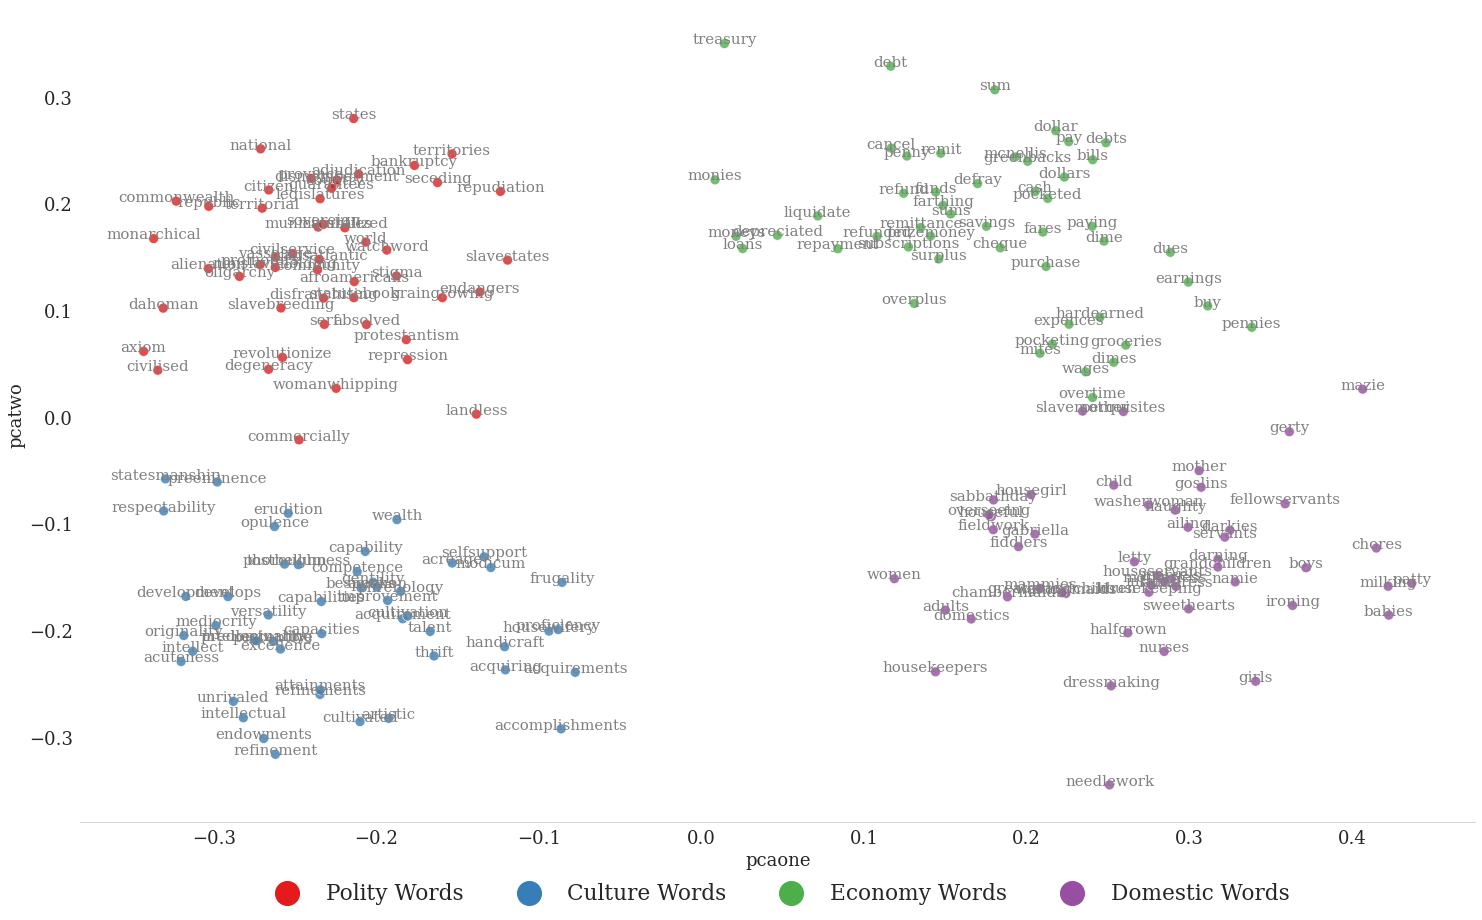

In [8]:
sns.set_style("whitegrid", {'axes.grid' : False})

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

palette = sns.color_palette("Set1", 4)

plt.figure(figsize=(25,15))
fig = sns.scatterplot(
    x="pcaone",
    y="pcatwo",
    hue="",
    palette=palette,
    data=df_mds,
    hue_order=['Polity Words', 'Culture Words', 'Economy Words', 'Domestic Words'],
    legend="full",
    alpha=0.8,
    s=100
)

#plt.xticks([])
#plt.yticks([])
#plt.xlabel("")
#plt.ylabel("")


fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)

# add annotations one by one with a loop
for line in range(0,df_mds.shape[0]):
     fig.text(df_mds.pcaone[line], 
             df_mds.pcatwo[line], 
             df_mds.index[line], 
             horizontalalignment='center', 
             size='small', 
             color='gray', 
             weight='normal')
        
fig.legend(loc='upper center', 
            bbox_to_anchor=(0.5, -0.05), 
            ncol=5,
            fontsize='large',
            markerscale=4,
            frameon=False,
            )

plt.savefig('../figures/pca_plot.pdf', dpi=300, bbox_inches = "tight")
plt.savefig('../figures/pca_plot.svg', dpi=300, bbox_inches = "tight")
plt.savefig('../figures/pca_plot.png', dpi=300, bbox_inches = "tight")

# Figure 2. Average Cosine Similarity Between Four Social Categories and Fifty Most Similar Words to Four Social Institutions, Represented via Four Pairwise Scatter Plots

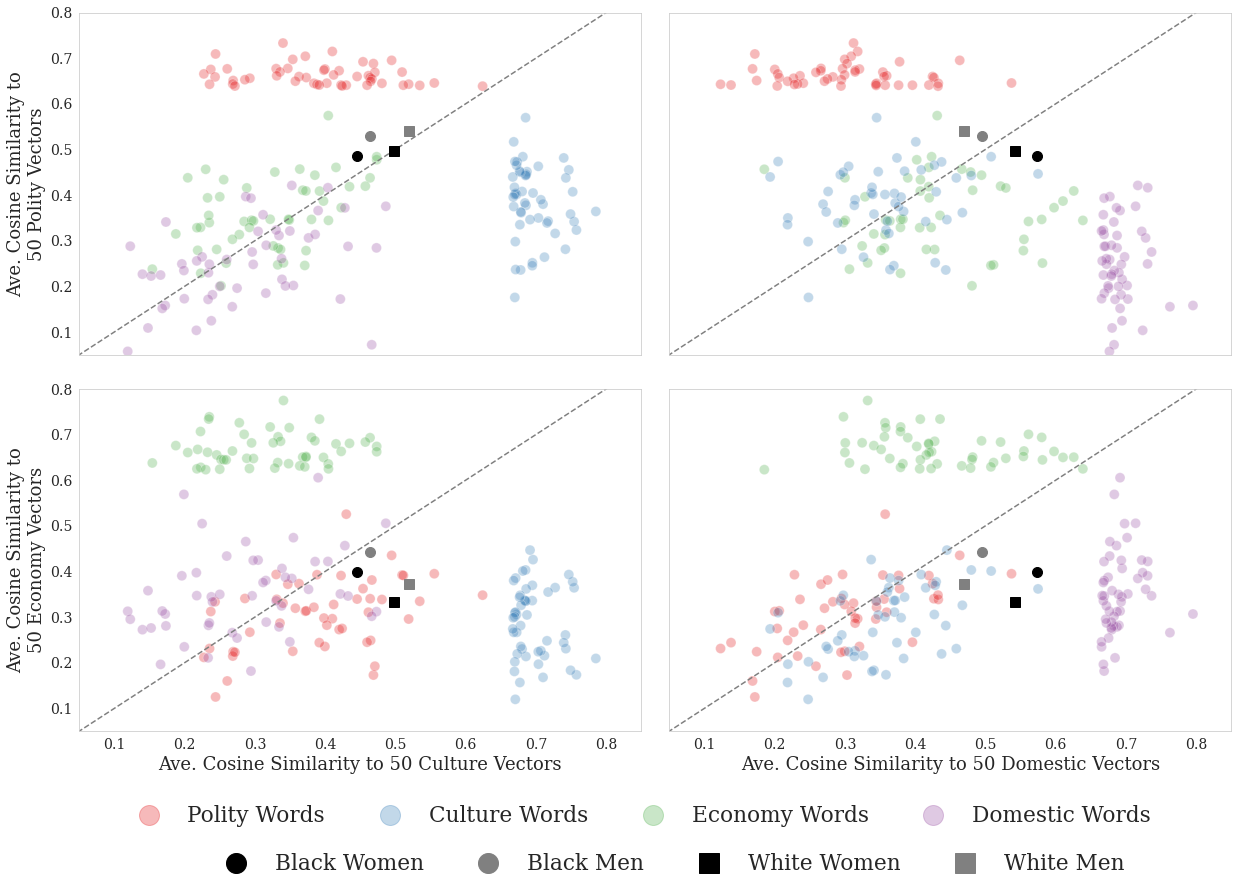

In [9]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

palette = sns.color_palette("Set1", 4)

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 10))
sns.scatterplot(x='culture', y = 'polity', hue = '',
                hue_order = ['Polity Words', 'Culture Words', 'Economy Words', 'Domestic Words'], 
                data=df, ax = ax[0][0], legend = False, s=100, alpha=0.3, palette=palette)
sns.scatterplot(x='culture', y = 'economy', hue = '', 
                hue_order = ['Polity Words', 'Culture Words', 'Economy Words', 'Domestic Words'], 
                data=df, ax = ax[1][0], s=100, alpha=0.3, palette=palette)
sns.scatterplot(x='domestic', y = 'polity', hue = '', 
                hue_order = ['Polity Words', 'Culture Words', 'Economy Words', 'Domestic Words'], 
                data=df, ax = ax[0][1], legend = False, s=100, alpha=0.3, palette=palette)
sns.scatterplot(x='domestic', y = 'economy', hue = '', 
                hue_order = ['Polity Words', 'Culture Words', 'Economy Words', 'Domestic Words'], 
                data=df, ax = ax[1][1], legend = False, s=100, alpha=0.3, palette=palette)


ax[1][0].plot([0, 1], [0, 1], linestyle='--', color='grey')
ax[1][0].plot(ww_culture, ww_economy, color='black', marker = 's', markersize = 10)
ax[1][0].plot(wm_culture, wm_economy, color='grey', marker = 's', markersize = 10)
ax[1][0].plot(bw_culture, bw_economy, color='black', marker = 'o', markersize = 10)
ax[1][0].plot(bm_culture, bm_economy, color='grey', marker = 'o', markersize = 10)

ax[0][0].plot([0, 1], [0, 1], linestyle='--', color='grey')
ax[0][0].plot(ww_culture, ww_polity, color='black', marker = 's', markersize = 10)
ax[0][0].plot(wm_culture, wm_polity, color='grey', marker = 's', markersize = 10)
ax[0][0].plot(bw_culture, bw_polity, color='black', marker = 'o', markersize = 10)
ax[0][0].plot(bm_culture, bm_polity, color='grey', marker = 'o', markersize = 10)

ax[1][1].plot([0, 1], [0, 1], linestyle='--', color='grey')
ax[1][1].plot(ww_domestic, ww_economy, color='black', marker = 's', markersize = 10)
ax[1][1].plot(wm_domestic, wm_economy, color='grey', marker = 's', markersize = 10)
ax[1][1].plot(bw_domestic, bw_economy, color='black', marker = 'o', markersize = 10)
ax[1][1].plot(bm_domestic, bm_economy, color='grey', marker = 'o', markersize = 10)

ax[0][1].plot([0, 1], [0, 1], linestyle='--', color='grey')
ax[0][1].plot(ww_domestic, ww_polity, color='black', marker = 's', markersize = 10)
ax[0][1].plot(wm_domestic, wm_polity, color='grey', marker = 's', markersize = 10)
ax[0][1].plot(bw_domestic, bw_polity, color='black', marker = 'o', markersize = 10)
ax[0][1].plot(bm_domestic, bm_polity, color='grey', marker = 'o', markersize = 10)


ax[0][1].set_xlim(0.05, 0.85)
ax[0][0].set_xlim(0.05, 0.85)
ax[0][0].set_ylim(0.05, 0.8)
ax[1][0].set_ylim(0.05, 0.8)




fig.subplots_adjust(top=0.999, left=0.1, right=0.9, bottom=0.001)  # create some space below the plots by increasing the bottom-value


legend_elements0 = [Line2D([0], [0], marker='o', color=palette[0], label='Polity Words', linestyle='', markersize=5, alpha=0.3),
                   Line2D([0], [0], marker='o', color=palette[1], label='Culture Words', linestyle='', markersize=5, alpha=0.3),
                   Line2D([0], [0], marker='o', color=palette[2], label='Economy Words', linestyle='', markersize=5, alpha=0.3),
                   Line2D([0], [0], marker='o', color=palette[3], label='Domestic Words', linestyle='', markersize=5, alpha=0.3)
                  ]

ax.flatten()[-2].legend(handles = legend_elements0,
                        loc='upper left', 
                        bbox_to_anchor=(0.05, -0.16), 
                        ncol=5,
                        fontsize='large',
                       markerscale=4,
                       frameon=False,
                       framealpha = 0.2)


legend_elements1 = [Line2D([0], [0], marker='o', color='black', label='Black Women', linestyle='', markersize=5),
                   Line2D([0], [0], marker='o', color='grey', label='Black Men', linestyle='', markersize=5),
                   Line2D([0], [0], marker='s', color='black', label='White Women', linestyle='', markersize=5),
                   Line2D([0], [0], marker='s', color='grey', label='White Men', linestyle='', markersize=5)
                  ]

ax.flatten()[-1].legend(handles = legend_elements1,
                        loc='upper center', 
                        bbox_to_anchor=(0.0, -0.30), 
                        ncol=5,
                        fontsize='large',
                       markerscale=4,
                       frameon=False,
                       title='')

ax[1][0].set_xlabel("Ave. Cosine Similarity to 50 Culture Vectors")
ax[1][0].tick_params(axis='x', labelsize= 14)
ax[1][1].set_xlabel("Ave. Cosine Similarity to 50 Domestic Vectors")
ax[1][1].tick_params(axis='x', labelsize= 14)
ax[1][0].set_ylabel("Ave. Cosine Similarity to\n50 Economy Vectors")
ax[1][0].tick_params(axis='y', labelsize= 14)
ax[0][0].set_ylabel("Ave. Cosine Similarity to\n50 Polity Vectors")
ax[0][0].tick_params(axis='y', labelsize= 14)


fig.subplots_adjust(wspace=0.05, hspace=0.1)

#Save figures as pdf and png
#fig.savefig('../figures/scatter_plots_institutions.pdf', dpi=300, bbox_inches = "tight")
#fig.savefig('../figures/scatter_plots_institutions.png', dpi=300, bbox_inches = "tight")

# Figure 3. Differences Between Mean Cosine Similarity for Six Pairwise Social Categories across Four Social Institutions

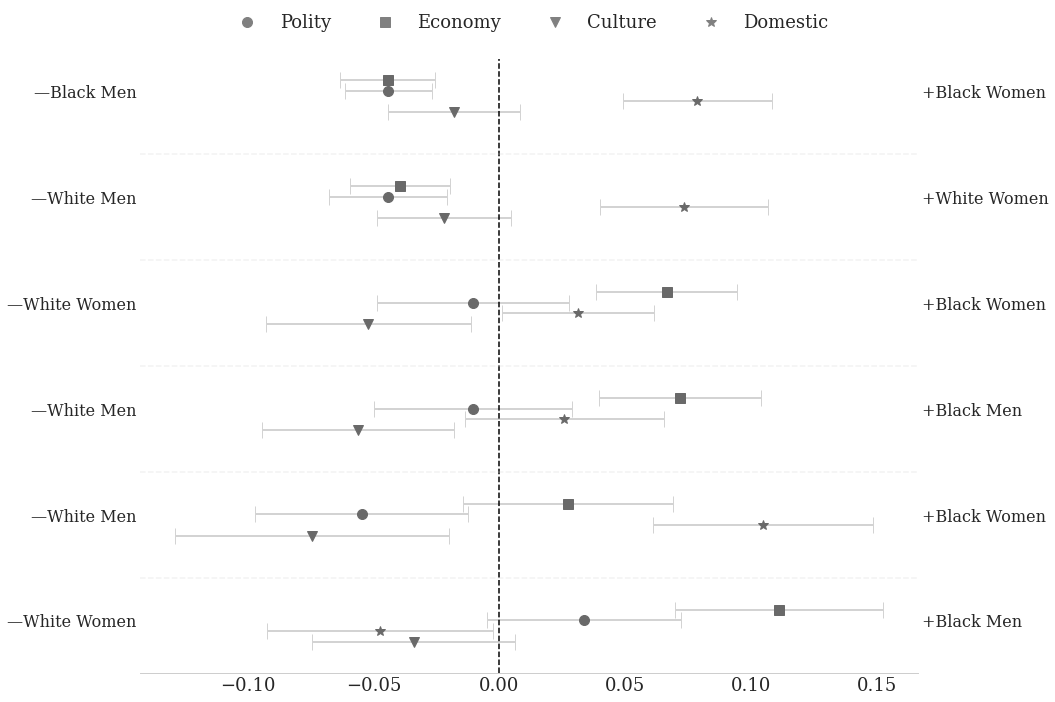

In [10]:
#CI plot, category x institution

# Polity
# Economy
# Culture
# Domestic

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#y_ticks = ("Polity", "Economy", "Culture", "Domestic")

y_1 = np.arange(1, 7)
y_2 = y_1 + 0.1
y_3 = y_1 - 0.2
y_4 = y_1 - 0.1

x_1 = [bw_bm_polity_mean, ww_wm_polity_mean, bw_ww_polity_mean,
      bm_wm_polity_mean, bw_wm_polity_mean, bm_ww_polity_mean]
x_1.reverse()

x_2 = [bw_bm_economy_mean, ww_wm_economy_mean, bw_ww_economy_mean, 
       bm_wm_economy_mean, bw_wm_economy_mean, bm_ww_economy_mean]
x_2.reverse()

x_3 = [bw_bm_culture_mean, ww_wm_culture_mean, bw_ww_culture_mean, 
       bm_wm_culture_mean, bw_wm_culture_mean, bm_ww_culture_mean]
x_3.reverse()

x_4 = [bw_bm_domestic_mean, ww_wm_domestic_mean, bw_ww_domestic_mean, 
       bm_wm_domestic_mean, bw_wm_domestic_mean, bm_ww_domestic_mean]
x_4.reverse()


err_1 = [bw_bm_polity_error, ww_wm_polity_error, bw_ww_polity_error, 
         bm_wm_polity_error, bw_wm_polity_error, bm_ww_polity_error]
err_1.reverse()

err_2 = [bw_bm_economy_error, ww_wm_economy_error, bw_ww_economy_error, 
         bm_wm_economy_error,  bw_wm_economy_error, bm_ww_economy_error]
err_2.reverse()

err_3 = [bw_bm_culture_error, ww_wm_culture_error, bw_ww_culture_error, 
         bm_wm_culture_error, bw_wm_culture_error, bm_ww_culture_error]
err_3.reverse()

err_4 = [bw_bm_domestic_error, ww_wm_domestic_error, bw_ww_domestic_error, 
         bm_wm_domestic_error, bw_wm_domestic_error, bm_ww_domestic_error]
err_4.reverse()


plt.errorbar(y=y_1, x=x_1, xerr=err_1, color="lightgray", capsize=8,
             linestyle="None",
             elinewidth = 2,
             marker="o", markersize=10, mfc="dimgray", mec="dimgray")

plt.errorbar(y=y_2, x=x_2, xerr=err_2, color="lightgray", capsize=8,
             linestyle="None",
             elinewidth = 2,
             marker="s", markersize=10, mfc="dimgray", mec="dimgray")

plt.errorbar(y=y_3, x=x_3, xerr=err_3, color="lightgray", capsize=8,
             linestyle="None",
             elinewidth = 2,
             marker="v", markersize=10, mfc="dimgray", mec="dimgray")

plt.errorbar(y=y_4, x=x_4, xerr=err_4, color="lightgray", capsize=8,
             linestyle="None",
             elinewidth = 2,
             marker="*", markersize=10, mfc="dimgray", mec="dimgray")

#plt.yticks(y_1, y_ticks, fontfamily='serif')



legend_elements1 = [Line2D([0], [0], marker='o', color='gray', label='Polity', linestyle='', markersize=5),
                    Line2D([0], [0], marker='s', color='gray', label='Economy', linestyle='', markersize=5),
                    Line2D([0], [0], marker='v', color='gray', label='Culture', linestyle='', markersize=5),
                    Line2D([0], [0], marker='*', color='gray', label='Domestic', linestyle='', markersize=5)
                    ]

ax.legend(handles = legend_elements1,
                        loc='upper center', 
                        bbox_to_anchor=(.5, 1.1), 
                        ncol=4,
                        fontsize='medium',
                       markerscale=2,
                       frameon=False,)

ax2 = ax.twinx()
ax.set_ylim(0.5,6.3)
ax2.set_ylim(0.5,6.3)
ax2.set_yticks([1, 2, 3, 4, 5, 6])
ax2.set_yticklabels(['+Black Men', '+Black Women', '+Black Men', 
                     '+Black Women', "+White Women", "+Black Women"],
                   fontsize=16,
                   fontfamily='serif')
ax.set_yticks([1, 2, 3, 4, 5, 6])
ax.set_yticklabels([ "—White Women", "—White Men", "—White Men", 
                   "—White Women", "—White Men", "—Black Men"], 
                   fontsize=16,
                  fontfamily='serif')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)

plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=1.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=2.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=3.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=4.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=5.4, color='lightgrey', linestyle='--', alpha=0.3)

plt.tight_layout()

#fig.savefig('../figures/ci_institutions.pdf', dpi=300, bbox_inches = "tight")
#fig.savefig('../figures/ci_institutions.png', dpi=300, bbox_inches = "tight")

plt.show()

# Figure 4. Distribution Plot of the Count of Culture Words by Document for Documents By or About Black Persons and Documents By White Authors

In [11]:
def get_path(pathname):
    """
    Get full pathname for file
    """
    allFiles = os.listdir(pathname)
    allFiles = [pathname+file for file in allFiles]
    return(allFiles)

def count_words(text, mylist):
    """
    This function takes a text and a list of words as input
    And outputs the words that appear in the text as a list, and a count of those words in the text
    Both as Pandas series
    """
    
    
    count = 0
    words = []
    
    if text == '':
        return(count, words)
    
    else:
        punct = string.punctuation + '“' + '”' + '‘' + "’"
        lower_case = text.lower()
        lower_case = lower_case.replace('—', ' ').replace('\n', ' ')

        # Iterate through text removing punctuation characters
        no_punct = "".join([char for char in lower_case if char not in punct])

        # Split text over whitespace into list of words
        tokens = no_punct.split()

        for word in tokens:
            if word in mylist:
                count+=1
                words.append(word)
            
        return(pandas.Series([count, set(words)]))

#Create dataframe to match with word embeddings
meta_fpn = pandas.read_csv('../data/first-person-narratives-american-south/data/toc.csv', encoding = 'utf-8')
meta_neh = pandas.read_csv('../data/na-slave-narratives/data/toc.csv', encoding = 'utf-8')
meta = pandas.concat([meta_fpn, meta_neh]).reset_index()

#Dropping multiple editions from the same autobiography
#Keeping the autobiography with the latest date

#349 and 270 = Frederick Douglass
#363 = William Wells Brown
meta.drop([349, 270, 363], inplace=True)

meta.drop_duplicates(subset = 'Filename', inplace=True)


path_fpn = get_path('../data/first-person-narratives-american-south/data/texts/') # indicate the local path where files are stored
path_neh = get_path('../data/na-slave-narratives/data/texts/')
path_all = path_fpn + path_neh

#remove duplicate files and multiple editions of same narrative
keep = meta['Filename'].tolist()
keep = [name.replace('.xml', '.txt') for name in keep]
filenames = []
path = []

for p in path_all:
    if (p.split('/')[-1] not in filenames) and (p.split('/')[-1] in keep):
        filenames.append(p.split('/')[-1])
        path.append(p)
    else:
        pass
    
data = []

for file in path:
    with open(file, encoding='utf-8') as myfile:
        data.append(myfile.read())

#drop dropped files from path list
path_match = [p.split('/')[-1].split('.')[0] for p in path]
path_neh_match = [p.split('/')[-1].split('.')[0] for p in path_neh]
path_neh_match.remove('neh-brown47-brown47')
path_neh_match.remove('neh-douglass-douglass')
path_neh_match.remove('neh-douglasslife-douglass')
filename_match = [p.split('.')[0] for p in meta['Filename'].tolist()]

df_text = meta.copy()

df_text['text'] = ''
df_text['race'] = 'white'

for idx, text in enumerate(data):
    index_num = meta[meta['Filename'].str.contains(path_match[idx])].index[0]
    text = text.replace('\n', ' ')
    df_text.at[index_num, 'text'] = text

for p in path_neh_match:
    index_num = meta[meta['Filename'].str.contains(p)].index[0]
    df_text.at[index_num, 'race'] = 'Black'

#Count culture and economy words in each text, add a column to meta

df_text[['culture_count', 'culture_list']] = df_text.apply(lambda x: count_words(x['text'], culture_words), axis=1)

df_text[['economy_count', 'economy_list']] = df_text.apply(lambda x: count_words(x['text'], economy_words), axis=1)

df_text['word_count'] = df_text['text'].apply(lambda x: len(x.split()))

df_text['culture_prop'] = (df_text['culture_count'] / df_text['word_count']) * 1000

df_text['economy_prop'] = (df_text['economy_count'] / df_text['word_count']) * 1000

## Basic metadata stats on files

In [12]:
print("Number of documents written by white women:")
print(len(df_text[(df_text['race']=='white') & (df_text['Gender']=='f')]))
print("\nNumber of documents written by white men:")
print(len(df_text[(df_text['race']=='white') & (df_text['Gender']=='m')]))
print("\nNumber of documents written by Black women:")
print(len(df_text[(df_text['race']=='Black') & (df_text['Gender']=='f')]))
print("\nNumber of documents written by Black men or about Black persons:")
print(len(df_text[(df_text['race']=='Black') & (df_text['Gender']=='m')]))

Number of documents written by white women:
41

Number of documents written by white men:
82

Number of documents written by Black women:
48

Number of documents written by Black men or about Black persons:
243


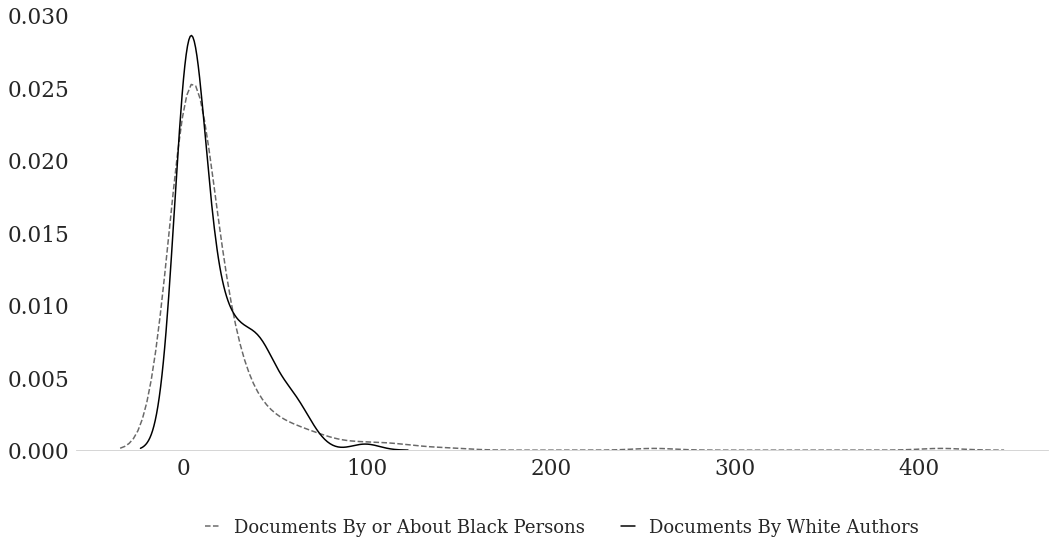

In [13]:
#create Figure 4
fig, ax = plt.subplots(1,1, sharey=True, sharex=True, figsize=[15,8])

sns.kdeplot(df_text['culture_count'][df_text['race']=='Black'], 
            color='dimgrey',
            linestyle = '--',
            label='Documents By or About Black Persons',
            )
sns.kdeplot(df_text['culture_count'][df_text['race']=='white'], 
            color='black',
            label='Documents By White Authors',
            )
            


ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_facecolor('white')
ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize='large',
    bottom=False,      # ticks along the bottom edge are off
    top=False
)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize='large',
    left=False     # ticks along the bottom edge are off
)

        
ax.legend(loc='upper center', 
                        prop={'family':'serif', 'size':18},
                        bbox_to_anchor=(0.5, -0.12), 
                        ncol=2,
                        frameon=False,
                        handlelength=.8

                       )

#fig.suptitle("Distribution Plot: Number of Culture Words", 
#             y=-.05,
#            fontsize=16,
#            family='serif')

plt.tight_layout()
plt.savefig('../figures/culture_distplot_final.pdf')
plt.savefig('../figures/culture_distplot_final.png')
plt.show()

In [14]:
#Identify qualitative examples to read

df_text[['Filename', 'Title', 'Author', 'culture_count', 'culture_prop', 'race', 'Gender']].sort_values(by='culture_count', ascending=False)[:10]

,Filename,Title,Author,culture_count,culture_prop,race,Gender
429,neh-armistead-armistead.xml,A Tribute for the Negro: Being a Vindication o...,Wilson Armistead,412,2.218465,Black,m
313,neh-simmons-simmons.xml,"Men of Mark: Eminent, Progressive and Rising",William J. Simmons,256,0.864004,Black,m
231,neh-adamsh-adamsh.xml,God's Image in Ebony: Being a Series of Biogra...,H. G. Adams,145,1.784418,Black,m
173,neh-holsey-holsey.xml,"Autobiography, Sermons, Addresses, and Essays ...",Lucius Henry Holsey,126,1.382367,Black,m
269,neh-dougl92-dougl92.xml,"Life and Times of Frederick Douglass, Written ...",Frederick Douglass,118,0.510827,Black,m
188,neh-brownww-brown.xml,"The Black Man: His Antecedents, His Genius, an...",William Wells Brown,111,1.419165,Black,m
164,neh-wards-ward.xml,Autobiography of a Fugitive Negro: His Anti-Sl...,Samuel Ringgold Ward,105,1.137829,Black,m
126,fpn-rankin-rankin.xml,The Story of My Life or More Than a Half Centu...,G. C. Rankin,99,0.882031,white,m
174,neh-washstory-washin.xml,An Autobiography: The Story of My Life and Work,Booker T. Washington,99,1.152396,Black,m
286,neh-beardj-beard.xml,"The Life of Toussaint L'Ouverture, the Negro P...",J. R. Beard,94,0.776058,Black,m


In [15]:
df_text[['Filename', 'Title', 'Author', 'culture_count', 'race', 'Gender']].sort_values(by='culture_count', ascending=True)[:10]

,Filename,Title,Author,culture_count,race,Gender
212,neh-kelley-kelley.xml,A Family Redeemed from Bondage; Being Rev. Edm...,Edmond Kelley,0,Black,m
357,neh-gronniosaw-gronnios.xml,A Narrative of the Most Remarkable Particulars...,James Albert Ukawsaw Gronniosaw,0,Black,m
89,fpn-negpeon-negpeon.xml,The New Slavery in the South--An Autobiography,A Georgia Negro Peon,0,white,m
276,neh-mars64-mars64.xml,"Life of James Mars, A Slave Born and Sold in C...",James Mars,0,Black,m
379,neh-bruceje-bruceje.xml,"Prince Hall, the Pioneer of Negro Masonry. Pro...",John Edward Bruce,0,Black,m
282,neh-andersonr-andersonr.xml,The Life of Rev. Robert Anderson. Born the 22d...,Robert Anderson,0,Black,m
283,neh-jamesth-jamesth.xml,"Life of Rev. Thomas James, by Himself",Thomas James,0,Black,m
35,fpn-grimes-grimes.xml,Extracts of Letters of Major-Gen'l Bryan Grime...,Bryan Grimes,0,white,m
348,neh-offley-offley.xml,A Narrative of the Life and Labors of the Rev....,G. W. Offley,0,Black,m
74,fpn-stone-stone.xml,"""Morgan's Men:"" A Narrative of Personal Experi...",Henry Lane Stone,0,white,m


In [16]:
df_text['culture_prop'].quantile([.10, .20, .30, .40, .50, .60, .70, .80, .90])

0.1    0.000000
0.2    0.066559
0.3    0.115936
0.4    0.184678
0.5    0.249834
0.6    0.315547
0.7    0.430362
0.8    0.534487
0.9    0.752548
Name: culture_prop, dtype: float64

In [17]:
df_text[['Filename', 'Title', 'Author', 'culture_count', 'race', 'Gender']][(df_text['culture_count']>40) & (df_text['culture_count']<50)].sort_values(by='culture_count', ascending=False)[:10]

,Filename,Title,Author,culture_count,race,Gender
94,fpn-merrick-merrick.xml,Old Times in Dixie Land: a Southern Matron's M...,Caroline Elizabeth Thomas Merrick,47,white,f
358,neh-pendleton-pendle.xml,A Narrative of the Negro,Leila Amos Pendleton,47,Black,f
76,fpn-pryor-pryor.xml,My Day: Reminiscences of a Long Life,Sara Agnes Rice Pryor,46,white,f
115,fpn-kearney-kearney.xml,A Slaveholder's Daughter,Belle Kearney,45,white,f
217,neh-doug1906-doug1906.xml,Frederick Douglass,Booker T. Washington,45,Black,m
21,fpn-taylor-taylor.xml,Destruction and Reconstruction: Personal Exper...,Richard Taylor,43,white,m
63,fpn-watterson2-watterson2.xml,Marse Henry: An Autobiography. Volume II,Henry Watterson,43,white,m
77,fpn-greenhow-greenhow.xml,My Imprisonment and the First Year of Abolitio...,Rose O'Neal Greenhow,43,white,f
130,fpn-aughey-aughey.xml,Tupelo,John H. Aughey,43,white,m
294,neh-lewisjw-lewisjw.xml,"The Life, Labors, and Travels of Elder Charles...",John W. Lewis,42,Black,m


In [18]:
df_text[['Filename', 'Title', 'Author', 'economy_count', 'economy_prop', 'race', 'Gender']].sort_values(by='economy_count', ascending=False)[:10]

,Filename,Title,Author,economy_count,economy_prop,race,Gender
313,neh-simmons-simmons.xml,"Men of Mark: Eminent, Progressive and Rising",William J. Simmons,510,1.721258,Black,m
370,neh-drew-drew.xml,A North-Side View of Slavery. The Refugee: or ...,Benjamin Drew,298,2.523264,Black,m
227,neh-rudd-rudd.xml,From Slavery to Wealth. The Life of Scott Bond...,Dan. A. Rudd,296,3.153297,Black,m
253,neh-pickard-pickard.xml,The Kidnapped and the Ransomed. Recollections ...,Kate E. R. Pickard,292,2.831433,Black,f
175,neh-smitham-smith.xml,An Autobiography: The Story of the Lord's Deal...,Amanda Smith,285,1.360148,Black,f
146,fpn-velazquez-velazquez.xml,The Woman in Battle: A Narrative of the Exploi...,Loreta Janeta Velazquez,279,1.233236,white,f
133,fpn-steward-steward.xml,"Twenty-Two Years a Slave, and Forty Years a Fr...",Austin Steward,252,3.074483,Black,m
147,fpn-pringle-pringle.xml,A Woman Rice Planter,Elizabeth Waties Allston Pringle,236,1.654387,white,f
269,neh-dougl92-dougl92.xml,"Life and Times of Frederick Douglass, Written ...",Frederick Douglass,221,0.956718,Black,m
20,fpn-felton-felton.xml,Country Life in Georgia in the Days of My Youth,Rebecca Latimer Felton,214,1.722195,white,f


# Figure 5. Differences Between Mean Cosine Similarity by Six Pairwise Social Categories and the Fifty Vectors Closest to the Authority Vector

/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


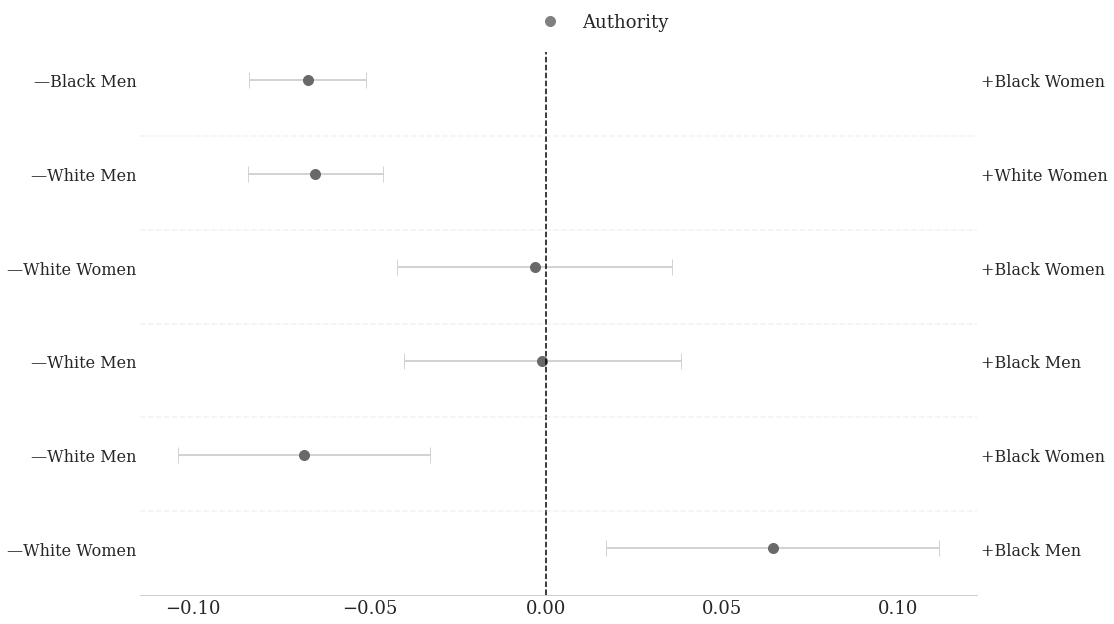

In [19]:
#CI plot, category x institution

# Polity
# Economy
# Culture
# Domestic

fig, ax = plt.subplots(1, 1, figsize=(15, 10))


y_1 = np.arange(1, 7)


x_1 = [bw_bm_authority_mean, ww_wm_authority_mean, bw_ww_authority_mean,
      bm_wm_authority_mean, bw_wm_authority_mean, bm_ww_authority_mean]
x_1.reverse()


err_1 = [bw_bm_authority_error, ww_wm_authority_error, bw_ww_authority_error, 
         bm_wm_authority_error, bw_wm_authority_error, bm_ww_authority_error]
err_1.reverse()


plt.errorbar(y=y_1, x=x_1, xerr=err_1, color="lightgray", capsize=8,
             linestyle="None",
             elinewidth = 2,
             marker="o", markersize=10, mfc="dimgray", mec="dimgray"
            )


#plt.yticks(y_1, y_ticks, fontfamily='serif')



legend_elements1 = [Line2D([0], [0], marker='o', color='gray', label='Authority', linestyle='', markersize=5)
                    ]

ax.legend(handles = legend_elements1,
                        loc='upper center', 
                        bbox_to_anchor=(.55, 1.1), 
                        ncol=1,
                        fontsize='medium',
                       markerscale=2,
                       frameon=False,)


ax2 = ax.twinx()
ax.set_ylim(0.5,6.3)
ax2.set_ylim(0.5,6.3)
ax2.set_yticks([1, 2, 3, 4, 5, 6])
ax2.set_yticklabels(['+Black Men', '+Black Women', '+Black Men', 
                     '+Black Women', "+White Women", "+Black Women"],
                   fontsize=16,
                   fontfamily='serif')
ax.set_yticks([1, 2, 3, 4, 5, 6])
ax.set_yticklabels([ "—White Women", "—White Men", "—White Men", 
                   "—White Women", "—White Men", "—Black Men"], 
                   fontsize=16,
                  fontfamily='serif')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)

plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=1.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=2.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=3.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=4.4, color='lightgrey', linestyle='--', alpha=0.3)
plt.axhline(y=5.4, color='lightgrey', linestyle='--', alpha=0.3)

fig.savefig('../figures/ci_authority.pdf', dpi=300, bbox_inches = "tight")
fig.savefig('../figures/ci_authority.png', dpi=300, bbox_inches = "tight")

plt.tight_layout()
plt.show()